<div style="background-color:red; color:white; size:20px;">The following is implemention of Rishi's code from the github.<br></div>

<br><br><br><br><br><br><br><br>

<div style="background-color:red; color:white; size:20px;">The following are the methods I tested. A summary of which is depicted in the below table.</div>

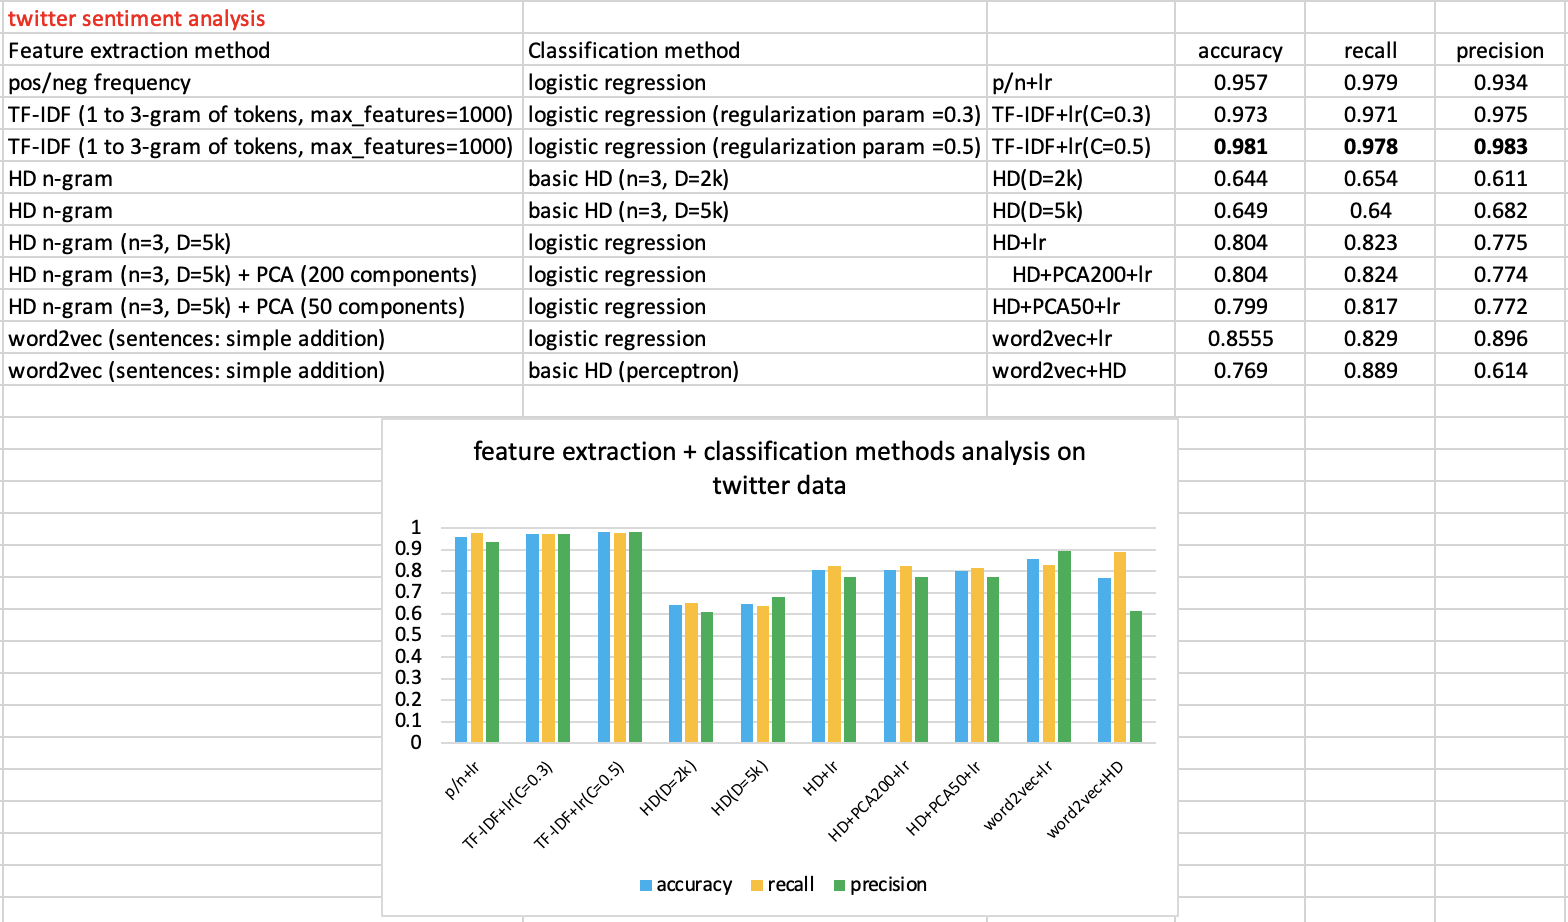

<br><br>

In [205]:
#importing the libraries, stopwords, etc.
import nltk
import numpy as np
nltk.download('stopwords')
#from utils import process_tweet, build_freqs
# importing the libraries 
import re #for regular expression operations
import string #for string operations
from nltk.corpus import stopwords #for importing stopwords
from nltk.stem import PorterStemmer #for importing stemmer 
from nltk.tokenize import TweetTokenizer #for importing tweet tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice #iter in dictionary
from keras.preprocessing import image #for plotting the wordcloud
import seaborn as sns
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc
from nltk.tokenize import word_tokenize
from scipy import sparse
from nltk.corpus import twitter_samples

In [5]:
#processing text: removing stopwords, punctuation. Doing stemming and tokenizing
def process_tweet(review):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    review_tokens = review.split()

    cleaned_review = []
    for word in review_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            cleaned_review.append(stem_word)
    return cleaned_review

In [6]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    word_l = process_tweet(tweet)
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    for word in word_l:
        
        x[0,1] += freqs.get((word, 1), 0)
        
        x[0,2] += freqs.get((word, 0), 0)
        
    assert(x.shape == (1, 3))
    return x

In [7]:
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [8]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = len(x)
    for i in range(0, num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)

        J = -1./m*(np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(), np.log(1-h)))
        theta = theta - alpha/m*np.dot(x.transpose(), (h-y))
    return float(J), theta

In [9]:
# UNQ_C4 GRADED FUNCTION: predict_tweet
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet, freqs)
    y_pred = sigmoid(np.dot(x, theta))    
    return y_pred

In [10]:
def sigmoid(z): 
    h = None
    h = 1./(1+np.power(np.e, -z))
    return h

In [11]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [12]:
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg
# combinung positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [11]:
# shape of train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [12]:
len(train_x)

8000

In [13]:
freqs = build_freqs(train_x, train_y)

In [48]:
freqs

{('#followfriday', 1.0): 23,
 ('@france_int', 1.0): 1,
 ('@pkuchly57', 1.0): 1,
 ('@milipol_pari', 1.0): 1,
 ('top', 1.0): 28,
 ('engag', 1.0): 7,
 ('member', 1.0): 13,
 ('commun', 1.0): 25,
 ('week', 1.0): 66,
 (':)', 1.0): 2632,
 ('@lamb2ja', 1.0): 1,
 ('hey', 1.0): 50,
 ('james!', 1.0): 3,
 ('how', 1.0): 18,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 68,
 ('call', 1.0): 26,
 ('contact', 1.0): 4,
 ('centr', 1.0): 1,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 6,
 ('assist', 1.0): 1,
 ('mani', 1.0): 25,
 ('thanks!', 1.0): 15,
 ('@despiteoffici', 1.0): 1,
 ('listen', 1.0): 14,
 ('last', 1.0): 38,
 ('night', 1.0): 41,
 ('as', 1.0): 3,
 ('you', 1.0): 91,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 33,
 ('track.', 1.0): 1,
 ('when', 1.0): 10,
 ('scotland?!', 1.0): 1,
 ('@97side', 1.0): 1,
 ('congrat', 1.0): 13,
 ('yeaaaah', 1.0): 1,
 ('yippppy!!!', 1.0): 1,
 ('accnt', 1.0): 1,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 57,
 ('blue', 1.0): 8,
 ('tick', 1.0):

In [49]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    y_hat = []
    
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            y_hat.append(1.0)
        else:
            y_hat.append(0.0)
    test_y = [int(i) for i in test_y]
    accuracy = np.sum(y_hat ==test_y)/len(test_y)
    return accuracy

In [50]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

Y = train_y
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

In [51]:
y_hat = []

for tweet in test_x:
    y_pred = predict_tweet(tweet, freqs, theta)

    if y_pred > 0.5:
        y_hat.append(1.0)
    else:
        y_hat.append(0.0)

In [98]:
len(test_y), len(y_hat)

(2000, 2000)

In [ ]:
+ - -> lr

In [100]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

print("test evluation")
acc = accuracy_score(y_hat, test_y)
recall = recall_score(y_hat, test_y)
precision  = precision_score(y_hat, test_y)
print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

test evluation
acc: 0.957 | recall: 0.9790356394129979 | precision: 0.934


<span style="color:red;">TF-IDF</span>

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
def all_features_tfidtransformer(corpus, n_range):
    """
    input: corpus: gets a corpus of data 
    input: n_range: range of the n-gram length
    output: derived features 
    """
    assert type(n_range) == tuple
    vectorizer = TfidfVectorizer(ngram_range=(n_range[0], n_range[1]), stop_words='english') #less than equal to 1
    vectorizer.fit_transform(corpus)
    features = vectorizer.get_feature_names()
    return features

features_1_gram = all_features_tfidtransformer(train_x, (1, 1))
features_1to2_gram = all_features_tfidtransformer(train_x, (1, 2))
features_1to3_gram = all_features_tfidtransformer(train_x, (1, 3))
features_1to4_gram = all_features_tfidtransformer(train_x, (1, 4))
features_1to5_gram = all_features_tfidtransformer(train_x, (1, 5))
print("There are {} 1-gram features in the training data.".format(len(features_1_gram)))
print("There are {} 2-gram features in the training data.".format(len(features_1to2_gram)-len(features_1_gram)))
print("There are {} 3-gram features in the training data.".format(len(features_1to3_gram)-len(features_1to2_gram)))
print("There are {} 4-gram features in the training data.".format(len(features_1to4_gram)-len(features_1to3_gram)))
print("There are {} 5-gram features in the training data.".format(len(features_1to5_gram)-len(features_1to4_gram)))

There are 17223 1-gram features in the training data.
There are 35174 2-gram features in the training data.
There are 30577 3-gram features in the training data.
There are 24411 4-gram features in the training data.
There are 19136 5-gram features in the training data.


In [53]:
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(1, 3),dtype=np.float32)
# Word ngram vector
tr_vect = vect_word.fit_transform(train_x)
ts_vect = vect_word.transform(test_x)

# Character n gram vector
tr_vect_char = vect_char.fit_transform(train_x)
ts_vect_char = vect_char.transform(test_x)
gc.collect()

X = sparse.hstack([tr_vect, tr_vect_char])
x_test = sparse.hstack([ts_vect, ts_vect_char])

def TfidfVectorizer_funct(trainx, devx, ngram_range):
    v_word = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                            stop_words= 'english',ngram_range=ngram_range,dtype=np.float32)
    v_c = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char',
                            stop_words= 'english',ngram_range=ngram_range,dtype=np.float32)
    t_v = v_word.fit_transform(trainx) # Word ngram vector for training data
    s_v = v_word.transform(devx) # Word ngram vector for dev data
    t_v_char = vect_char.fit_transform(trainx) # Character n gram vector for training data
    s_v_char = vect_char.transform(devx) # Character n gram vector for dev data
    X = sparse.hstack([t_v, t_v_char])
    dev_x = sparse.hstack([s_v, s_v_char])
    return X, dev_x

In [154]:
ngram_range=(1,2)
v_word = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,2),dtype=np.float32)
v_word
v_c = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=ngram_range,dtype=np.float32)
t_v = v_word.fit_transform(train_x) # Word ngram vector for training data
s_v = v_word.transform(test_x) # Word ngram vector for dev data
t_v_char = vect_char.fit_transform(train_x) # Character n gram vector for training data
s_v_char = vect_char.transform(test_x) # Character n gram vector for dev data
X = sparse.hstack([t_v, t_v_char])
dev_x = sparse.hstack([s_v, s_v_char])

In [56]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

def return_val(x):
    if x <0.5:
        return 0
    return 1
        
def eval_tfidvect(c, ngram_range, trainx, devx, trainy, testy):
    X, dev_x = TfidfVectorizer_funct(trainx, devx, ngram_range)
    prd = []
    cv_score =[]
    lr = LogisticRegression(C=c)
    lr.fit(X,trainy)
    prd = lr.predict_proba(dev_x)[:,1]
    prd_val = [return_val(x) for x in prd]
    print("test evluation")
    acc = accuracy_score(testy, prd_val)
    recall = recall_score(testy, prd_val)
    precision  = precision_score(testy, prd_val)
    print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))
    prd = lr.predict_proba(X)[:,1]
    prd_val = [return_val(x) for x in prd]   
    print("training evluation")
    acc = accuracy_score(trainy, prd_val)
    recall = recall_score(trainy, prd_val)
    precision  = precision_score(trainy, prd_val)
    print("acc: {} | recall: {} | precision: {}".format(np.round(acc, 2), np.round(recall, 2), np.round(precision, 2)))

In [121]:
eval_tfidvect(0.3, (1,1), train_x, test_x, train_y, test_y)

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


test evluation
acc: 0.9735 | recall: 0.971 | precision: 0.9758793969849247
training evluation
acc: 0.99 | recall: 0.99 | precision: 0.99


In [124]:
import gensim.downloader as api
#model = api.load('word2vec-google-news-300')

In [54]:
ngram_range=(1,3)
v_word = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=ngram_range,dtype=np.float32)
v_word
v_c = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=ngram_range,dtype=np.float32)
t_v = v_word.fit_transform(train_x) # Word ngram vector for training data
s_v = v_word.transform(test_x) # Word ngram vector for dev data
t_v_char = vect_char.fit_transform(train_x) # Character n gram vector for training data
s_v_char = vect_char.transform(test_x) # Character n gram vector for dev data
X = sparse.hstack([t_v, t_v_char])
dev_x = sparse.hstack([s_v, s_v_char])

In [60]:
eval_tfidvect(0.3, (1,3), train_x, test_x, train_y, test_y)

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test evluation
acc: 0.9735 | recall: 0.971 | precision: 0.9758793969849247
training evluation
acc: 0.99 | recall: 0.99 | precision: 0.99


In [61]:
eval_tfidvect(0.5, (1,3), train_x, test_x, train_y, test_y)

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test evluation
acc: 0.981 | recall: 0.978 | precision: 0.9839034205231388
training evluation
acc: 0.99 | recall: 0.99 | precision: 0.99


<span style="color:red;">Basic n-gram HD</span>

In [252]:
alphabet = {' ': 1}
for sentence in train_x:
    words = sentence.split(" ")
    for w in words:
        for c in w:
            if c not in alphabet:
                alphabet[c] = 1
            else:
                alphabet[c] += 1
#     result = {}
#     for k,v in alphabet.items():
#         if v <= 10:
#             pass
#         else:
#             result[k] = v

In [248]:
# alphabet = {' ': 1}
# for sentence in test_x:
#     words = sentence.split(" ")
#     for w in words:
#         for c in w:
#             if c not in alphabet_test:
#                 alphabet_test[c] = 1
#             else:
#                 alphabet_test[c] += 1

In [304]:
def initialize_vecs(alphabet, D):
    init_vecs = {}
    for c in alphabet:
        binary_vec = np.random.choice([0, 1], size=(D,), p=[1/2, 1/2])
        init_vecs[c] = binary_vec
    return init_vecs
init_vecs = initialize_vecs(alphabet, D)
init_vecs["a"]

array([0, 0, 1, ..., 1, 0, 1])

In [307]:
def HD_encode_sentence(sentence, init_vecs, D, n):
    enc_hvs = np.array([0]*D)
    for j in range(len(sentence) - (n-1)):
        if sentence[j] not in init_vecs:
            init_vecs[sentence[j]] = np.array([0]*D)
        for k in range(0, n):
            if k == 0:
                temp = np.roll(init_vecs[sentence[j]], 0)
            else:
                temp = np.multiply(np.roll(init_vecs[sentence[j]], k), temp)
            enc_hvs += temp
    return enc_hvs
HD_encode_sentence(sentence, init_vecs, D, n)

array([117,  48,  78, ..., 193, 179,  76])

In [268]:
def encode_all_sentences(x, D, n, init_vecs):
    encoded_sentences = []
#     i = 0
    for sentence in x:
#         i+=1
#         print(i)
        encoded = HD_encode_sentence(sentence, init_vecs, D, n)
        encoded_sentences.append(encoded)
    return encoded_sentences

In [269]:
encoded_training = encode_all_sentences(train_x, D=2000, n=3, init_vecs=init_vecs)
encoded_test = encode_all_sentences(test_x, D=2000, n=3, init_vecs=init_vecs)

In [34]:
def train_HD(encoded_training, train_y, D):
    class_hvs = [[0.] * D] * (max(train_y) + 1)
    for i in range(0, len(encoded_training)):
        if train_y[i] == 1:
            class_hvs[1] += encoded_training[i] #positive
        else:
            class_hvs[0] += encoded_training[i] #negative
    return class_hvs
#class_hvs = train_HD(encoded_training, train_y, D)

In [285]:
class_norms = [np.linalg.norm(hv) for hv in class_hvs]

In [288]:
class_hvs, class_norms

([array([215427., 175077., 172702., ..., 354096., 411651., 161765.]),
  array([262648., 212752., 201126., ..., 402801., 466047., 193432.])],
 [10008887.821270952, 11581680.497773413])

In [57]:
def max_match(class_hvs, enc_hv):
    max_score = -np.inf
    max_index = -1
    for i in range(len(class_hvs)):
        score = np.matmul(class_hvs[i], enc_hv) / class_norms[i]
        if score > max_score:
            max_score = score
            max_index = i
    return max_index

In [293]:
def predict_HD(encoded_test, test_y, class_hvs):
    preds = []
    for i in range(0, len(encoded_test)):
        y_hat = max_match(class_hvs, encoded_test[i])
        preds.append(y_hat)
    return preds

In [294]:
preds = predict_HD(encoded_test, test_y, class_hvs)

In [292]:
len(encoded_test)

2000

In [296]:
print("test evluation")
acc = accuracy_score(preds, test_y)
recall = recall_score(preds, test_y)
precision  = precision_score(preds, test_y)
print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

test evluation
acc: 0.6445 | recall: 0.654876741693462 | precision: 0.611


<span style="color:red;">Basic n-gram HD with D=10000</span>

In [300]:
alphabet = {' ': 1}
for sentence in train_x:
    words = sentence.split(" ")
    for w in words:
        for c in w:
            if c not in alphabet:
                alphabet[c] = 1
            else:
                alphabet[c] += 1

In [315]:
def do_HD(D, n, train_x, test_x, alphabet):
    init_vecs = initialize_vecs(alphabet, D)
    print(D)
    encoded_training = encode_all_sentences(train_x, D, n, init_vecs=init_vecs)
    print(D)
    encoded_test = encode_all_sentences(test_x, D, n, init_vecs=init_vecs)
    class_hvs = train_HD(encoded_training, train_y, D)
    class_norms = [np.linalg.norm(hv) for hv in class_hvs]
    preds = predict_HD(encoded_test, test_y, class_hvs)
    print("test evluation")
    acc = accuracy_score(preds, test_y)
    recall = recall_score(preds, test_y)
    precision  = precision_score(preds, test_y)
    print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

In [316]:
do_HD(5000, 3, train_x, test_x, alphabet)

5000
5000
test evluation
acc: 0.6495 | recall: 0.64037558685446 | precision: 0.682


In [317]:
do_HD(10000, 3, train_x, test_x, alphabet)

10000
10000
test evluation
acc: 0.6315 | recall: 0.5908776779543884 | precision: 0.855


In [319]:
do_HD(2000, 4, train_x, test_x, alphabet)

2000
2000
test evluation
acc: 0.512 | recall: 0.5060728744939271 | precision: 1.0


In [320]:
import string
alphabet = list(string.ascii_lowercase)

In [321]:
def do_HD(D, n, train_x, test_x, alphabet):
    init_vecs = initialize_vecs(alphabet, D)
    print(D)
    encoded_training = encode_all_sentences(train_x, D, n, init_vecs=init_vecs)
    print(D)
    encoded_test = encode_all_sentences(test_x, D, n, init_vecs=init_vecs)
    class_hvs = train_HD(encoded_training, train_y, D)
    class_norms = [np.linalg.norm(hv) for hv in class_hvs]
    preds = predict_HD(encoded_test, test_y, class_hvs)
    print("test evluation")
    acc = accuracy_score(preds, test_y)
    recall = recall_score(preds, test_y)
    precision  = precision_score(preds, test_y)
    print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

In [322]:
do_HD(5000, 3, train_x, test_x, alphabet)

5000
5000
test evluation
acc: 0.504 | recall: 0.5020120724346077 | precision: 0.998


In [327]:
#processing text: removing stopwords, punctuation. Doing stemming and tokenizing
def process_tweet(review):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    review_tokens = review.split()

    cleaned_review = []
    for word in review_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            word = word.lower()
            stem_word = stemmer.stem(word)  # stemming word
            cleaned_review.append(stem_word)
    return cleaned_review

In [337]:
processed = []
for t in train_x:
    p = process_tweet(t)
    t = ""
    for i in p:
        t += i + " "
    processed.append(t)

In [338]:
def do_HD(D, n, train_x, test_x, alphabet):
    init_vecs = initialize_vecs(alphabet, D)
    print(D)
    encoded_training = encode_all_sentences(train_x, D, n, init_vecs=init_vecs)
    print(D)
    encoded_test = encode_all_sentences(test_x, D, n, init_vecs=init_vecs)
    class_hvs = train_HD(encoded_training, train_y, D)
    class_norms = [np.linalg.norm(hv) for hv in class_hvs]
    preds = predict_HD(encoded_test, test_y, class_hvs)
    print("test evluation")
    acc = accuracy_score(preds, test_y)
    recall = recall_score(preds, test_y)
    precision  = precision_score(preds, test_y)
    print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

In [339]:
do_HD(5000, 3, processed, test_x, alphabet)

5000
5000
test evluation
acc: 0.504 | recall: 0.5020120724346077 | precision: 0.998


In [340]:
do_HD(5000, 3, train_x, test_x, alphabet)

5000
5000
test evluation
acc: 0.504 | recall: 0.5020120724346077 | precision: 0.998


<span style="color:red;">Is it encoding or is it feature extraction based on the above results that is not working well?</span>

In [358]:
X[0]

array([[0, 1, 1, ..., 1, 0, 1]])

In [373]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# X = [[0, 1, 1, 0], [0, 1, 1, 0], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [0, 0, 1, 0], [1, 1 , 1, 1]]
# y = [0,1, 1, 0, 1, 1, 1, 0]

X = encoded_training
y = train_y

model = LogisticRegression(solver='liblinear')
model = model.fit(X,y)

print('coef', model.coef_)
print('intercept', model.intercept_)

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


coef [[-0.00594298 -0.01207994  0.01376144 ...  0.01557845  0.01316345
  -0.02657414]]
intercept [-0.74412257]


In [377]:
#!pip install scikit-learn  -U
preds = model.predict(encoded_test)

In [378]:
print("test evluation")
acc = accuracy_score(preds, test_y)
recall = recall_score(preds, test_y)
precision  = precision_score(preds, test_y)
print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

test evluation
acc: 0.8045 | recall: 0.8235919234856536 | precision: 0.775


In [376]:
len(pred)

2000

In [374]:
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0).fit(encoded_training, train_y)
# pred = clf.predict(encoded_test)

<span style="color:red;">HD encoding + PCA + lr </span>

In [389]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train = pca.fit_transform(encoded_training)
X_test = pca.transform(encoded_test)

model = LogisticRegression(solver='liblinear')
model = model.fit(X_train,y)
preds = model.predict(X_test)

print("test evluation")
acc = accuracy_score(preds, test_y)
recall = recall_score(preds, test_y)
precision  = precision_score(preds, test_y)
print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


test evluation
acc: 0.7995 | recall: 0.816931216931217 | precision: 0.772


In [388]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_train = pca.fit_transform(encoded_training)
X_test = pca.transform(encoded_test)

model = LogisticRegression(solver='liblinear')
model = model.fit(X_train,y)
preds = model.predict(X_test)

print("test evluation")
acc = accuracy_score(preds, test_y)
recall = recall_score(preds, test_y)
precision  = precision_score(preds, test_y)
print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


test evluation
acc: 0.8045 | recall: 0.8242811501597445 | precision: 0.774


<span style="color:red;"> freq_based + HD </span>

In [412]:
X = []
for i in range(len(train_x)):
    t = extract_features(train_x[i], freqs)
    X.append(t.ravel().tolist())

In [510]:
# D = 2   
# a = 0 
# b = 0
# class_hvs = [[0.] * D] * (max(y_train) + 1)
# for i in range(0, len(X)):
#     if train_y[i] == 1:
#         a+= 1
#         class_hvs[0][0] += X[i][1] #positive
#         class_hvs[0][1] += X[i][2] #positive
#     else:
#         b+= 1
#         class_hvs[1][0] += X[i][1] #negative
#         class_hvs[1][1] += X[i][2] #negative
# class_hvs

In [457]:
max_pos = 0
min_pos = np.inf
max_neg = 0
min_neg = np.inf
for i in range(len(X)):
    if X[i][1] > max_pos:
        max_pos = X[i][1]
    if X[i][1] < min_pos:
        min_pos = X[i][1]
    if X[i][0] > max_neg:
        max_neg = X[i][1]
    if X[i][1] < min_neg:
        min_neg = X[i][1]   
min_neg, max_neg, min_pos, max_pos

(0.0, 2797.0, 0.0, 18555.0)

In [ ]:
#Dont know how to use these 2D vecs as input to HD training

In [ ]:
#.

In [ ]:
#.

In [ ]:
#.

<span style="color:red;">TF - IDF + HD </span>

In [14]:
n_range = (1, 3)
vectorizer = TfidfVectorizer(ngram_range=(n_range[0], n_range[1]), stop_words='english') #less than equal to 1
vectorizer.fit_transform(train_x)
features = vectorizer.get_feature_names()

tfidf_matrix = vectorizer.fit_transform(train_x)
npm_tfidf = tfidf_matrix.todense()
document_1_vector = npm_tfidf[0]

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#tf_idf_vectors = []
for i in range(0, len(train_x)):
    doc_vector = npm_tfidf[i]
    tf_idf_vectors.append(doc_vector[0].tolist()[0])

In [19]:
tf_idf_vectors.append(doc_vector[-1].tolist()[0])

In [21]:
len(tf_idf_vectors[0])

82974

In [22]:
len(tf_idf_vectors[1])

82974

In [23]:
len(tf_idf_vectors[2])

82974

In [ ]:
tfidf_matrix = vectorizer.fit_transform(test_x)
npm_tfidf = tfidf_matrix.todense()
test_tf_idf_vectors = []
for i in range(0, len(test_x)):
    if i %100 == 0:
        print(i)
    doc_vector = npm_tfidf[i]
    test_tf_idf_vectors.append(doc_vector[0].tolist()[0])

In [45]:
class_hvs = [[0.] * len(tf_idf_vectors)] * (2)
for i in range(0, len(tf_idf_vectors)):
    if train_y[i] == 1:
        class_hvs[1] += tf_idf_vectors[i] #positive
    else:
        class_hvs[0] += tf_idf_vectors[i] #negative

In [52]:
class_norms = [np.linalg.norm(hv) for hv in class_hvs]

In [53]:
class_norms

[89.35323161475466, 89.35323161475466]

In [183]:
preds = []
for i in range(0, 1):
    max_score = -np.inf
    max_index = -1
    for j in range(len(class_hvs)):
        score = np.matmul(class_hvs[j], test_tf_idf_vectors) / class_norms[j]
        if score > max_score:
            max_score = score
            max_index = j
            preds.append(max_index)

NameError: name 'test_tf_idf_vectors' is not defined

In [ ]:
np.dot(class_hvs[0], test_tf_idf_vectors) / class_norms[j]

In [ ]:
#max_match(class_hvs, test_tf_idf_vectors[0])

In [62]:
len(preds)

0

In [62]:
# print("test evluation")
# acc = accuracy_score(preds, test_y)
# recall = recall_score(preds, test_y)
# precision  = precision_score(preds, test_y)
# print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

<span style="color:red;">CNN</span>

<span style="color:red;">word2vec encoding + HD</span>

In [86]:
def process_tweet(review):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    review_tokens = review.split()

    cleaned_review = []
    for word in review_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            cleaned_review.append(stem_word)
    return cleaned_review

In [87]:
train_x[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [88]:
cleaned_review = []
for sentence in train_x:
    cleaned_review.append(process_tweet(sentence))

In [89]:
sentences = cleaned_review

In [119]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
w2v_model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
w2v_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
w2v_model.save(model_name)

INFO - 12:27:15: collecting all words and their counts
INFO - 12:27:15: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:27:15: collected 20228 word types from a corpus of 67190 raw words and 8000 sentences
INFO - 12:27:15: Loading a fresh vocabulary
INFO - 12:27:15: effective_min_count=40 retains 217 unique words (1% of original 20228, drops 20011)
INFO - 12:27:15: effective_min_count=40 leaves 29263 word corpus (43% of original 67190, drops 37927)
INFO - 12:27:15: deleting the raw counts dictionary of 20228 items
INFO - 12:27:15: sample=0.001 downsamples 88 most-common words
INFO - 12:27:15: downsampling leaves estimated 16098 word corpus (55.0% of prior 29263)
INFO - 12:27:15: estimated required memory for 217 words and 300 dimensions: 629300 bytes
INFO - 12:27:15: resetting layer weights
INFO - 12:27:15: training model with 4 workers on 217 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
INFO - 12:27:15: worker thread finish

Training model...


INFO - 12:27:15: EPOCH - 4 : training on 67190 raw words (16117 effective words) took 0.0s, 895684 effective words/s
INFO - 12:27:15: worker thread finished; awaiting finish of 3 more threads
INFO - 12:27:15: worker thread finished; awaiting finish of 2 more threads
INFO - 12:27:15: worker thread finished; awaiting finish of 1 more threads
INFO - 12:27:15: worker thread finished; awaiting finish of 0 more threads
INFO - 12:27:15: EPOCH - 5 : training on 67190 raw words (16043 effective words) took 0.0s, 912505 effective words/s
INFO - 12:27:15: training on a 335950 raw words (80571 effective words) took 0.1s, 550414 effective words/s
WARNING - 12:27:15: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
INFO - 12:27:15: precomputing L2-norms of word weight vectors
INFO - 12:27:15: saving Word2Vec object under 300features_40minwords_10context, separately None
INFO - 12:27:15: not storing attribute vectors_norm
INFO - 12:27:15: not storing attribu

In [124]:
try: 
    model["now!"]
except:
    pass

<ipython-input-124-20dcd951f17a>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model["now!"]


In [136]:
v = []
for i in range(len(sentences)):
    encoded_sentences_vec = np.zeros(300)
    for w in sentences[i]:
        vec = np.zeros(300)
        try:
            vec = w2v_model[w]
        except:
            pass
        encoded_sentences_vec =  [j+k for j,k in zip(vec, encoded_sentences_vec)]
    v.append(encoded_sentences_vec)

<ipython-input-136-1f62d6cbbd9f>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = w2v_model[w]


In [141]:
len(v), len(v[0])

(8000, 300)

In [171]:
class_hvs = [[0.] * 300] * (2)
for i in range(0, len(v)):
    if train_y[i] == 1:
        class_hvs[1] = [m+n for m,n in zip(v[i],class_hvs[1])] #positive
    else:
        class_hvs[0] = [m+n for m,n in zip(v[i],class_hvs[0])] #negative

In [172]:
len(class_hvs[0])

300

In [173]:
class_norms = [np.linalg.norm(hv) for hv in class_hvs]

In [174]:
class_norms

[14505.114343551433, 14696.049648038064]

In [175]:
cleaned_test = []
for sentence in test_x:
    cleaned_test.append(process_tweet(sentence))

In [176]:
#cleaned_test[0]

In [177]:
test_v = []
for i in range(len(test_x)):
    test_encoded_sentences_vec = np.zeros(300)
    for w in cleaned_test[i]:
        vec = np.zeros(300)
        try:
            vec = w2v_model[w]
        except:
            pass
        test_encoded_sentences_vec =  [j+k for j,k in zip(vec, test_encoded_sentences_vec)]
    test_v.append(test_encoded_sentences_vec)

<ipython-input-177-57e37ed52af3>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = w2v_model[w]


In [178]:
len(class_hvs[1])

300

In [182]:
len(test_v[0])

300

In [180]:
len(class_hvs[j]), len(test_v)

(300, 2000)

In [196]:
preds = []
for i in range(0, len(test_x)):
    max_score = -np.inf
    max_index = -1
    for j in range(len(class_hvs)):
        score = np.matmul(class_hvs[j], test_v[i]) / class_norms[j]
        if score > max_score:
            max_score = score
            max_index = j
    preds.append(max_index)#inja

In [197]:
len(test_x), len(preds)

(2000, 2000)

In [198]:
len(preds)

2000

In [199]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

print("test evluation")
acc = accuracy_score(preds, test_y)
recall = recall_score(preds, test_y)
precision  = precision_score(preds, test_y)
print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

test evluation
acc: 0.769 | recall: 0.8898550724637682 | precision: 0.614


In [ ]:
lr

In [202]:
model = LogisticRegression(solver='liblinear')
model = model.fit(v,train_y)

#print('coef', model.coef_)
#print('intercept', model.intercept_)
pred_lr = model.predict(test_v)

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [204]:
print("test evluation")
acc = accuracy_score(pred_lr, test_y)
recall = recall_score(pred_lr, test_y)
precision  = precision_score(pred_lr, test_y)
print("acc: {} | recall: {} | precision: {}".format(acc, recall, precision))

test evluation
acc: 0.8555 | recall: 0.8288621646623496 | precision: 0.896


In [2]:
import gensim 
from gensim.models import Word2Vec
from gensim import models

In [23]:
model1 = gensim.models.Word2Vec(train_x, min_count = 1, 
                              size = 100, window = 5)

In [24]:
model1

In [31]:
#train_x

In [28]:
model1.similarity()

In [37]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [38]:
from gensim.models.phrases import Phrases, Phraser


In [41]:
!pwd

/Users/fatemeh/Desktop


In [48]:
import pandas as pd

# Read data from files 
train = pd.read_csv( "/Users/fatemeh/Desktop/labeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3 )
test = pd.read_csv( "testData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv( "unlabeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3 )

# Verify the number of reviews that were read (100,000 in total)
print ("Read %d labeled train reviews, %d labeled test reviews, " \
 "and %d unlabeled reviews\n" % (train["review"].size,  
 test["review"].size, unlabeled_train["review"].size ))

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews



In [49]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [50]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download()   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [60]:
#sentences

In [52]:
sentences = []  # Initialize an empty list of sentences

print ("Parsing sentences from training set")
for review in train["review"]:
    sentences += review_to_sentences(review, tokenizer)

print ("Parsing sentences from unlabeled set")
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set


/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Parsing sentences from unlabeled set


/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like re

In [53]:
# Check how many sentences we have in total - should be around 850,000+
print(len(sentences))
print (sentences[0])
#[u'with', u'all', u'this', u'stuff', u'going', u'down', u'at', u'the', u'moment', u'with', u'mj', u'i', u've', u'started', u'listening', u'to', u'his', u'music', u'watching', u'the', u'odd', u'documentary', u'here', u'and', u'there', u'watched', u'the', u'wiz', u'and', u'watched', u'moonwalker', u'again']

print(sentences[1])
#[u'maybe', u'i', u'just', u'want', u'to', u'get', u'a', u'certain', u'insight', u'into', u'this', u'guy', u'who', u'i', u'thought', u'was', u'really', u'cool', u'in', u'the', u'eighties', u'just', u'to', u'maybe', u'make', u'up', u'my', u'mind', u'whether', u'he', u'is', u'guilty', u'or', u'innocent']

795538
['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again']
['maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent']


In [55]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

INFO - 11:45:42: collecting all words and their counts
INFO - 11:45:42: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 11:45:42: PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
INFO - 11:45:42: PROGRESS: at sentence #20000, processed 451892 words, keeping 24948 word types
INFO - 11:45:42: PROGRESS: at sentence #30000, processed 671315 words, keeping 30034 word types


Training model...


INFO - 11:45:43: PROGRESS: at sentence #40000, processed 897815 words, keeping 34348 word types
INFO - 11:45:43: PROGRESS: at sentence #50000, processed 1116963 words, keeping 37761 word types
INFO - 11:45:43: PROGRESS: at sentence #60000, processed 1338404 words, keeping 40723 word types
INFO - 11:45:43: PROGRESS: at sentence #70000, processed 1561580 words, keeping 43333 word types
INFO - 11:45:43: PROGRESS: at sentence #80000, processed 1780887 words, keeping 45714 word types
INFO - 11:45:43: PROGRESS: at sentence #90000, processed 2004996 words, keeping 48135 word types
INFO - 11:45:43: PROGRESS: at sentence #100000, processed 2226966 words, keeping 50207 word types
INFO - 11:45:43: PROGRESS: at sentence #110000, processed 2446580 words, keeping 52081 word types
INFO - 11:45:43: PROGRESS: at sentence #120000, processed 2668775 words, keeping 54119 word types
INFO - 11:45:43: PROGRESS: at sentence #130000, processed 2894303 words, keeping 55847 word types
INFO - 11:45:43: PROGRESS: 

INFO - 11:45:50: training model with 4 workers on 16490 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
INFO - 11:45:51: EPOCH 1 - PROGRESS: at 8.50% examples, 1072134 words/s, in_qsize 7, out_qsize 0
INFO - 11:45:52: EPOCH 1 - PROGRESS: at 17.91% examples, 1126535 words/s, in_qsize 7, out_qsize 0
INFO - 11:45:53: EPOCH 1 - PROGRESS: at 26.30% examples, 1105738 words/s, in_qsize 7, out_qsize 0
INFO - 11:45:54: EPOCH 1 - PROGRESS: at 35.21% examples, 1111110 words/s, in_qsize 7, out_qsize 0
INFO - 11:45:55: EPOCH 1 - PROGRESS: at 43.25% examples, 1093890 words/s, in_qsize 7, out_qsize 0
INFO - 11:45:56: EPOCH 1 - PROGRESS: at 51.31% examples, 1082203 words/s, in_qsize 7, out_qsize 0
INFO - 11:45:57: EPOCH 1 - PROGRESS: at 59.73% examples, 1082698 words/s, in_qsize 7, out_qsize 0
INFO - 11:45:58: EPOCH 1 - PROGRESS: at 67.12% examples, 1065097 words/s, in_qsize 7, out_qsize 0
INFO - 11:45:59: EPOCH 1 - PROGRESS: at 73.68% examples, 1038261 words/s, in_qsize

INFO - 11:46:51: not storing attribute vectors_norm
INFO - 11:46:51: not storing attribute cum_table
INFO - 11:46:52: saved 300features_40minwords_10context


In [56]:
model.doesnt_match("man woman child kitchen".split())

<ipython-input-56-c4c7e8da36b4>:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  model.doesnt_match("man woman child kitchen".split())
/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'kitchen'

In [57]:
model.most_similar("man")

<ipython-input-57-216414787a03>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar("man")


[('woman', 0.6276639103889465),
 ('lady', 0.6024833917617798),
 ('lad', 0.5955742001533508),
 ('monk', 0.5641527771949768),
 ('guy', 0.5276097059249878),
 ('men', 0.5253722667694092),
 ('millionaire', 0.5190467834472656),
 ('soldier', 0.5095278024673462),
 ('sailor', 0.5071665048599243),
 ('poet', 0.503013551235199)]